In [15]:
"""
Script to perform statistical analysis on PRIDE Doppler FDETS files.

This script:
- Loads standard SPICE kernels.
- Initializes PRIDE characterization tools.
- Extracts Doppler noise, SNR, and elevation data from FDETS input files.
- Generates user-defined parameter plots (SNR, Doppler noise, raw FDETS).
- Generates elevation plots for each station and the whole experiment.
- Computes statistical summaries (mean, std) of SNR and Doppler noise.
- Combines SNR and elevation plots into single images for each station/date.

This specific demo is configured to analyze:
- Mission: 'juice'
- Experiment: 'ec094b'

Input folder structure assumed:
    /{dataset}/{mission_name}/{experiment_name}/input/complete/

Output folder structure:
    /{dataset}/{mission_name}/{experiment_name}/output/

Note:
This code has to be run before being able to run dataset_statistics.py .
"""

"\nScript to perform statistical analysis on PRIDE Doppler FDETS files.\n\nThis script:\n- Loads standard SPICE kernels.\n- Initializes PRIDE characterization tools.\n- Extracts Doppler noise, SNR, and elevation data from FDETS input files.\n- Generates user-defined parameter plots (SNR, Doppler noise, raw FDETS).\n- Generates elevation plots for each station and the whole experiment.\n- Computes statistical summaries (mean, std) of SNR and Doppler noise.\n- Combines SNR and elevation plots into single images for each station/date.\n\nThis specific demo is configured to analyze:\n- Mission: 'juice'\n- Experiment: 'ec094b'\n\nInput folder structure assumed:\n    /{dataset}/{mission_name}/{experiment_name}/input/complete/\n\nOutput folder structure:\n    /{dataset}/{mission_name}/{experiment_name}/output/\n\nNote:\nThis code has to be run before being able to run dataset_statistics.py .\n"

In [16]:
from pride_characterization_library import PrideDopplerCharacterization
import os

In [17]:
# Initialize classes
pride = PrideDopplerCharacterization()
process_fdets = pride.ProcessFdets()
utilities = pride.Utilities()
analysis = pride.Analysis(process_fdets, utilities)

In [18]:
# Define experiments to analyze
experiments_to_analyze = {
    'juice': ['ec094b']
}

Performing Statistical Analysis for mission: juice (Horizons Code: 2023-053A)...
Extracting Parameters for filename: ../small_dataset/juice/ec094b/input/complete/Fdets.jc2024.03.06.O6.complete.r2i.txt...
Extracting Parameters for filename: ../small_dataset/juice/ec094b/input/complete/Fdets.jc2024.03.06.Nt.complete.r2i.txt...
Extracting Parameters for filename: ../small_dataset/juice/ec094b/input/complete/Fdets.jc2024.03.06.Ef.complete.r2i.txt...
Extracting Parameters for filename: ../small_dataset/juice/ec094b/input/complete/Fdets.jc2024.03.06.Mc.complete.r2i.txt...
Extracting Parameters for filename: ../small_dataset/juice/ec094b/input/complete/Fdets.jc2024.03.06.Hh.complete.r2i.txt...
Extracting Parameters for filename: ../small_dataset/juice/ec094b/input/complete/Fdets.jc2024.03.06.Tr.complete.r2i.txt...
Extracting Parameters for filename: ../small_dataset/juice/ec094b/input/complete/Fdets.jc2024.03.06.Ir.complete.r2i.txt...
Extracting Parameters for filename: ../small_dataset/juice

/Users/lgisolfi/CLionProjects/Allan_Features/Analysis_Scripts/pride_characterization_library.py:3674: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(num_days, 1, figsize=(10, 5 * num_days), sharex=True)


Combined image saved to: ../small_dataset/juice/ec094b/output/elevation_snr_noise/Ef_2024.03.06-05:43:05-07:29:47_combined.png
Combined image saved to: ../small_dataset/juice/ec094b/output/elevation_snr_noise/Hh_2024.03.06-05:43:05-07:17:45_combined.png
Combined image saved to: ../small_dataset/juice/ec094b/output/elevation_snr_noise/Ir_2024.03.06-05:43:05-06:26:45_combined.png
Combined image saved to: ../small_dataset/juice/ec094b/output/elevation_snr_noise/Mc_2024.03.06-05:43:05-07:17:45_combined.png
Combined image saved to: ../small_dataset/juice/ec094b/output/elevation_snr_noise/Nt_2024.03.06-05:30:05-07:29:45_combined.png
Combined image saved to: ../small_dataset/juice/ec094b/output/elevation_snr_noise/O6_2024.03.06-05:30:05-07:29:45_combined.png
Combined image saved to: ../small_dataset/juice/ec094b/output/elevation_snr_noise/Tr_2024.03.06-05:43:05-07:29:49_combined.png
Combined image saved to: ../small_dataset/juice/ec094b/output/elevation_snr_noise/Wb_2024.03.06-05:43:05-07:24:

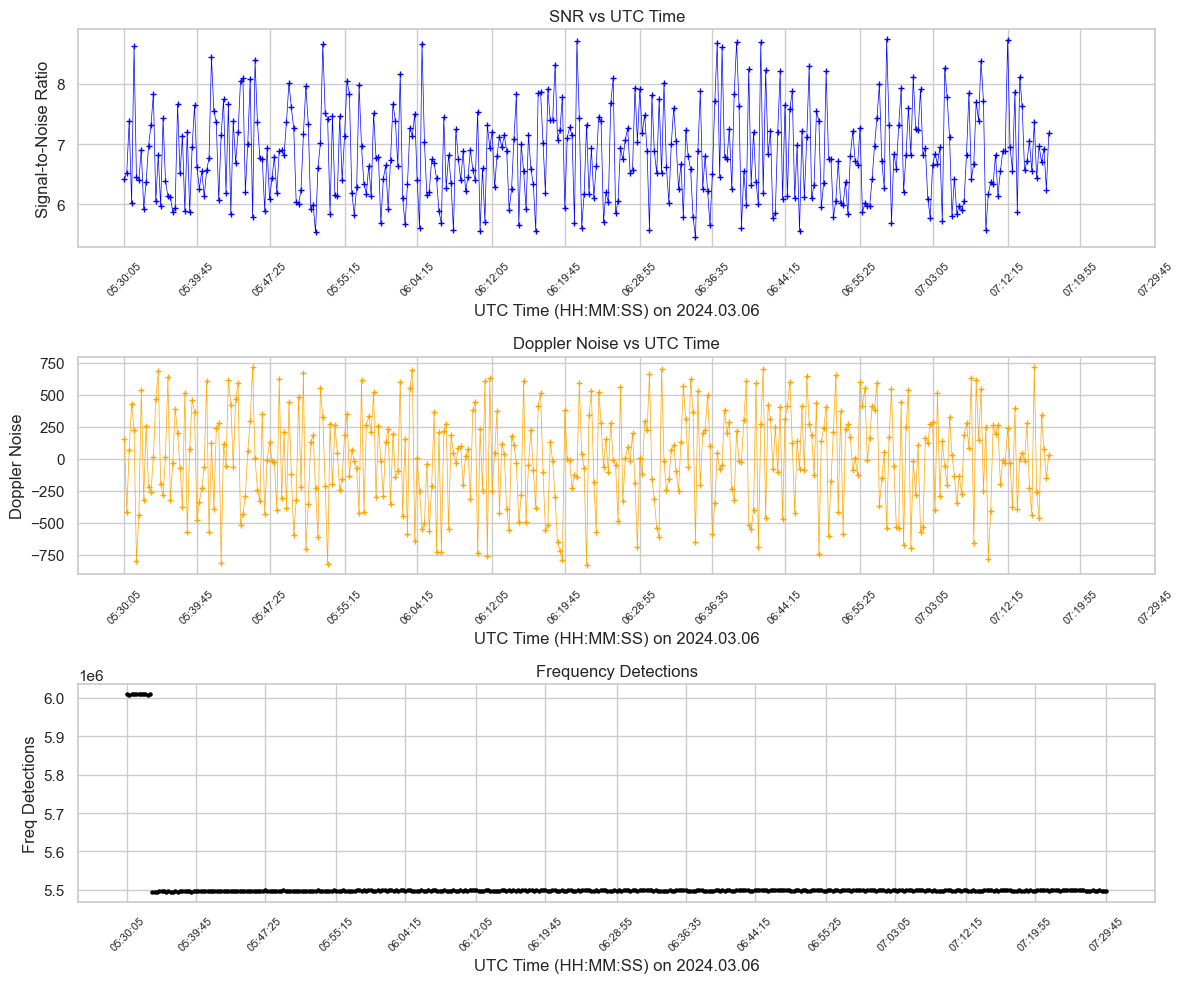

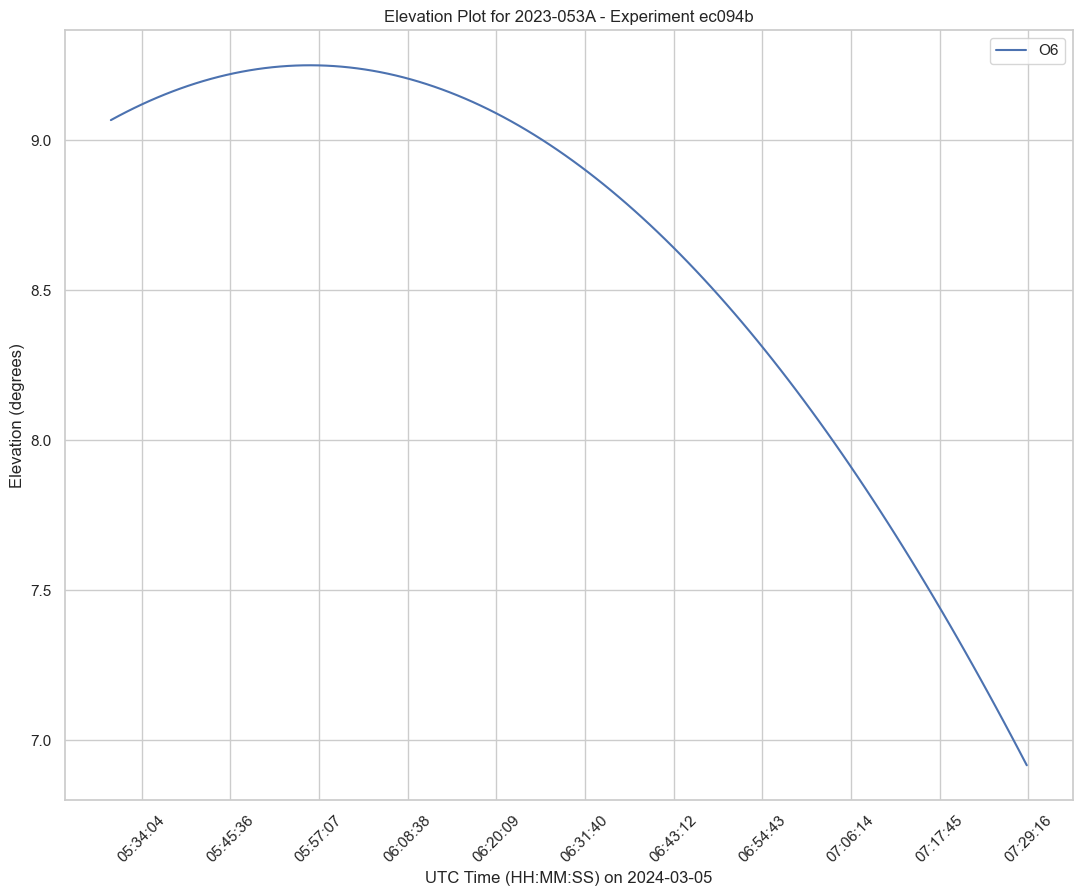

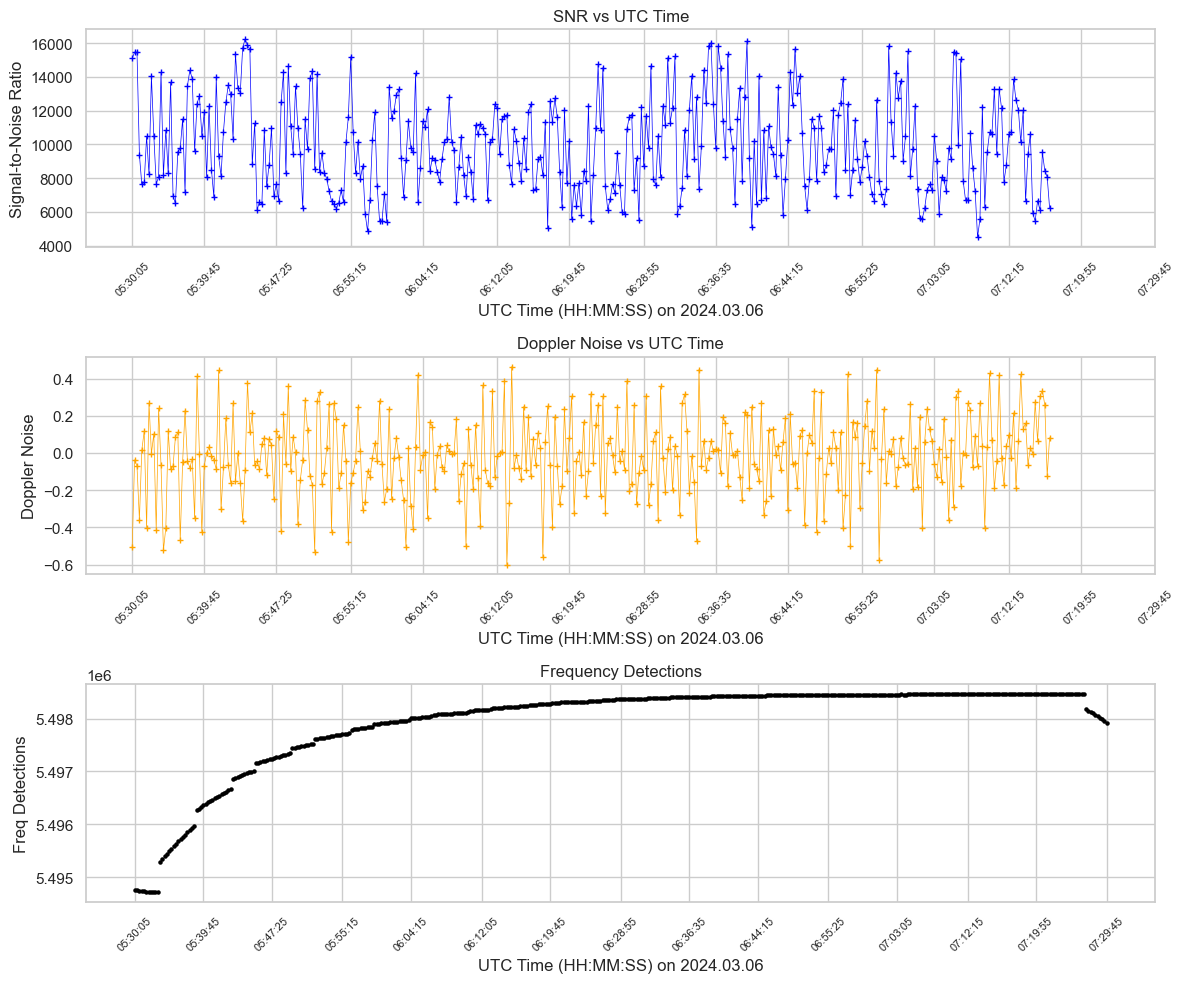

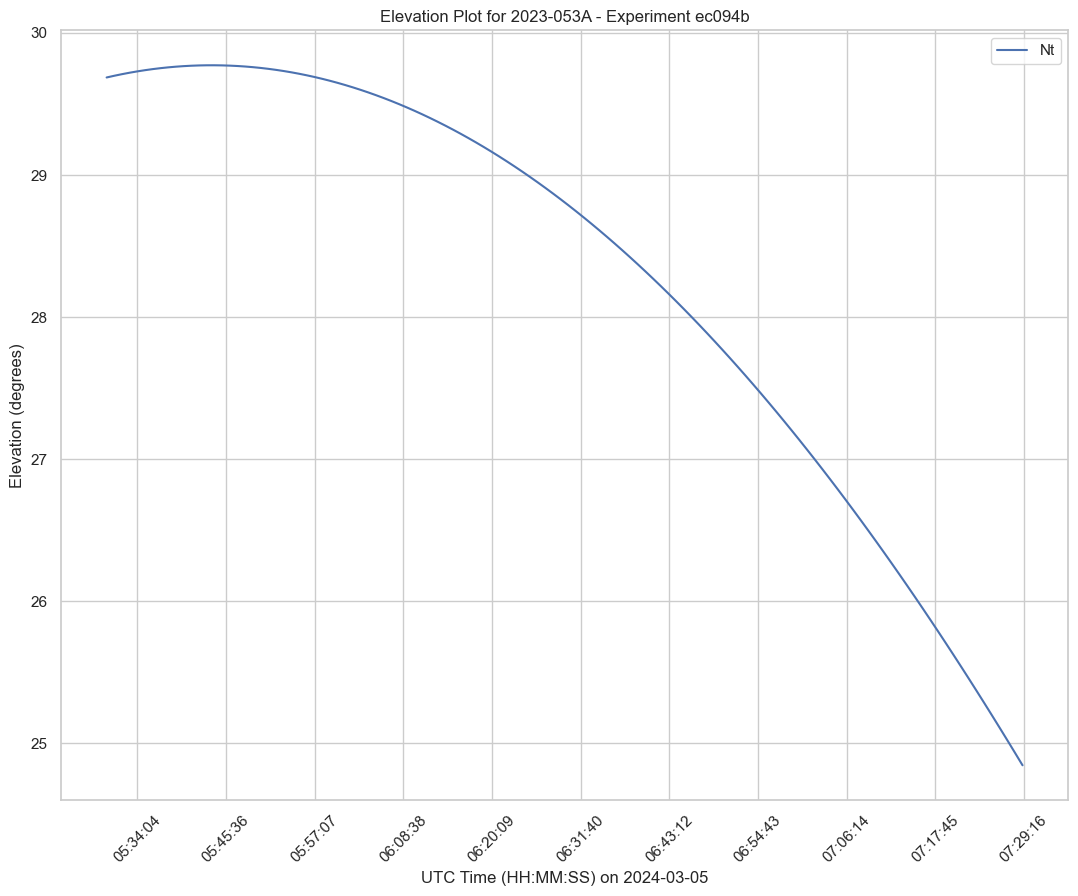

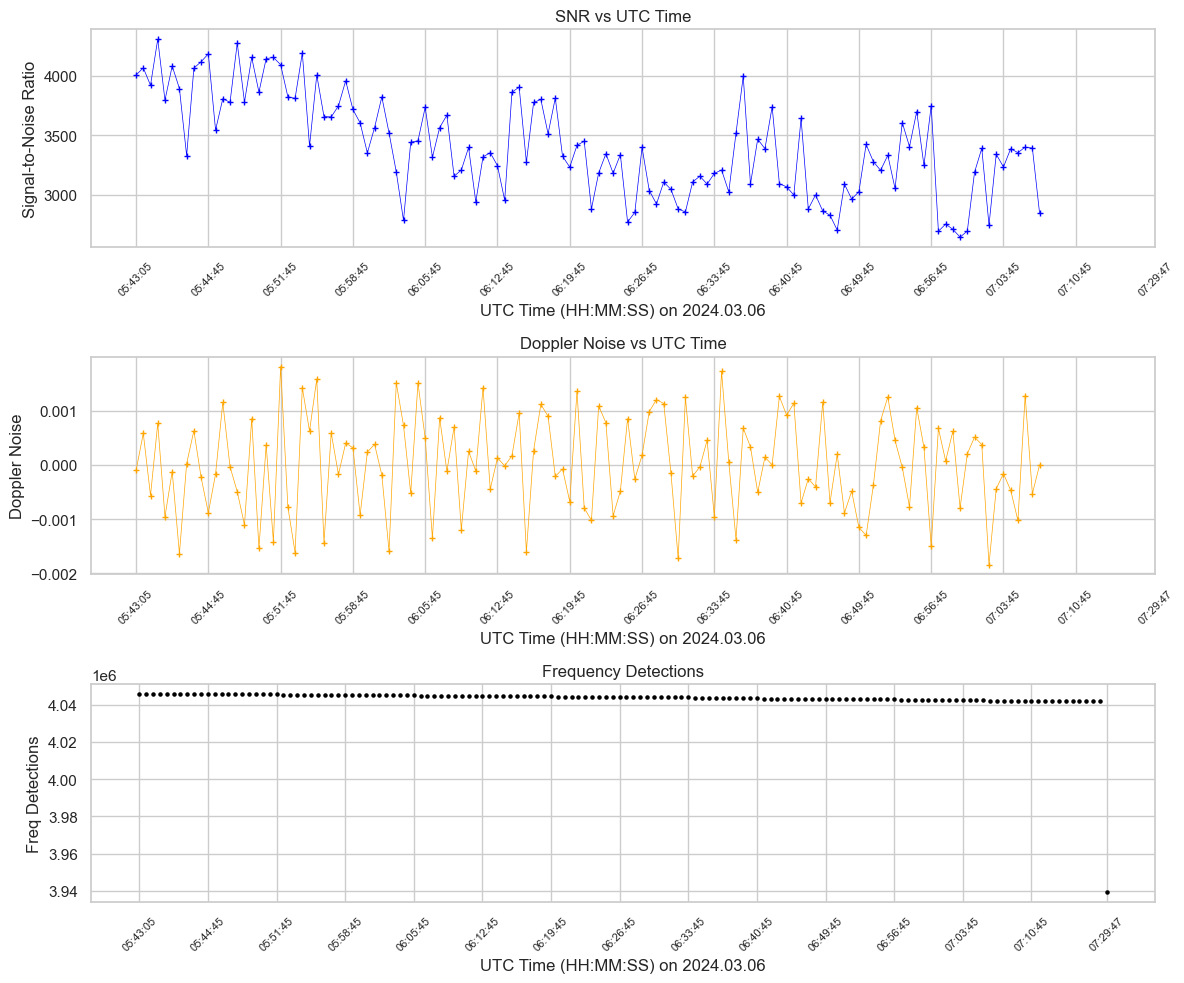

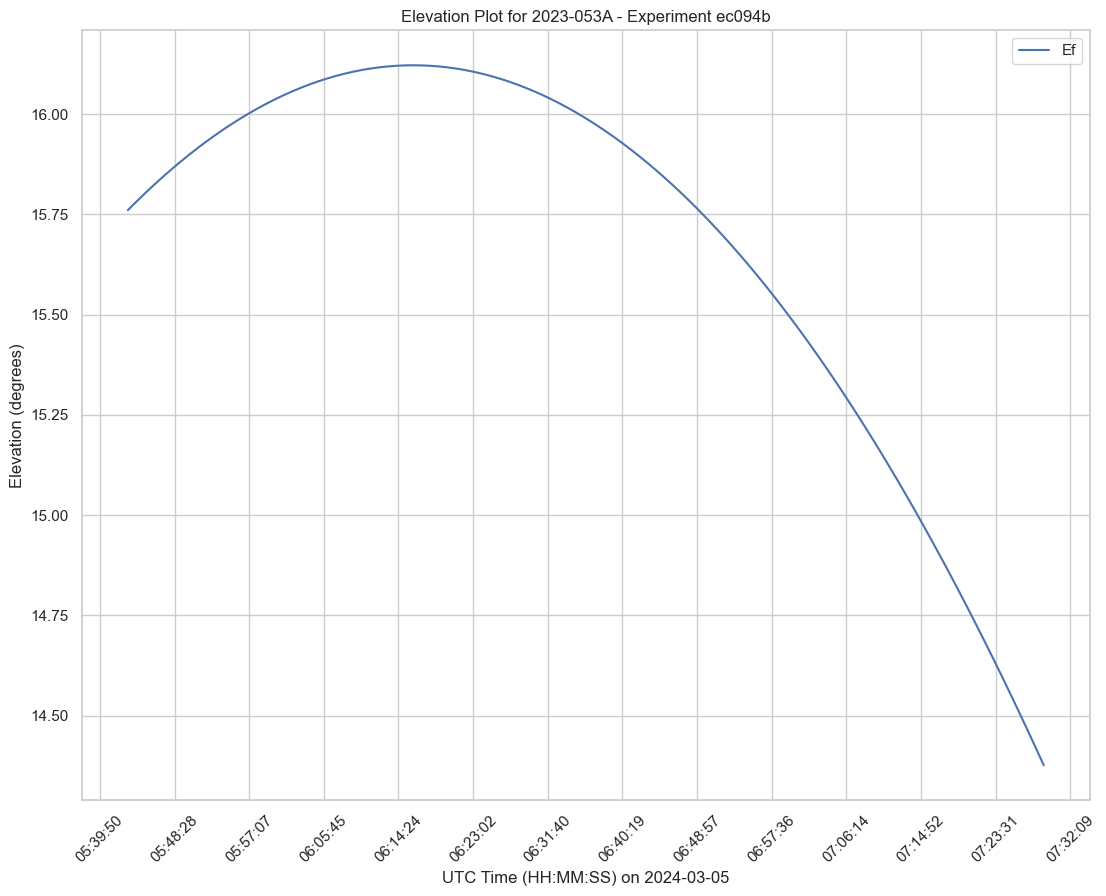

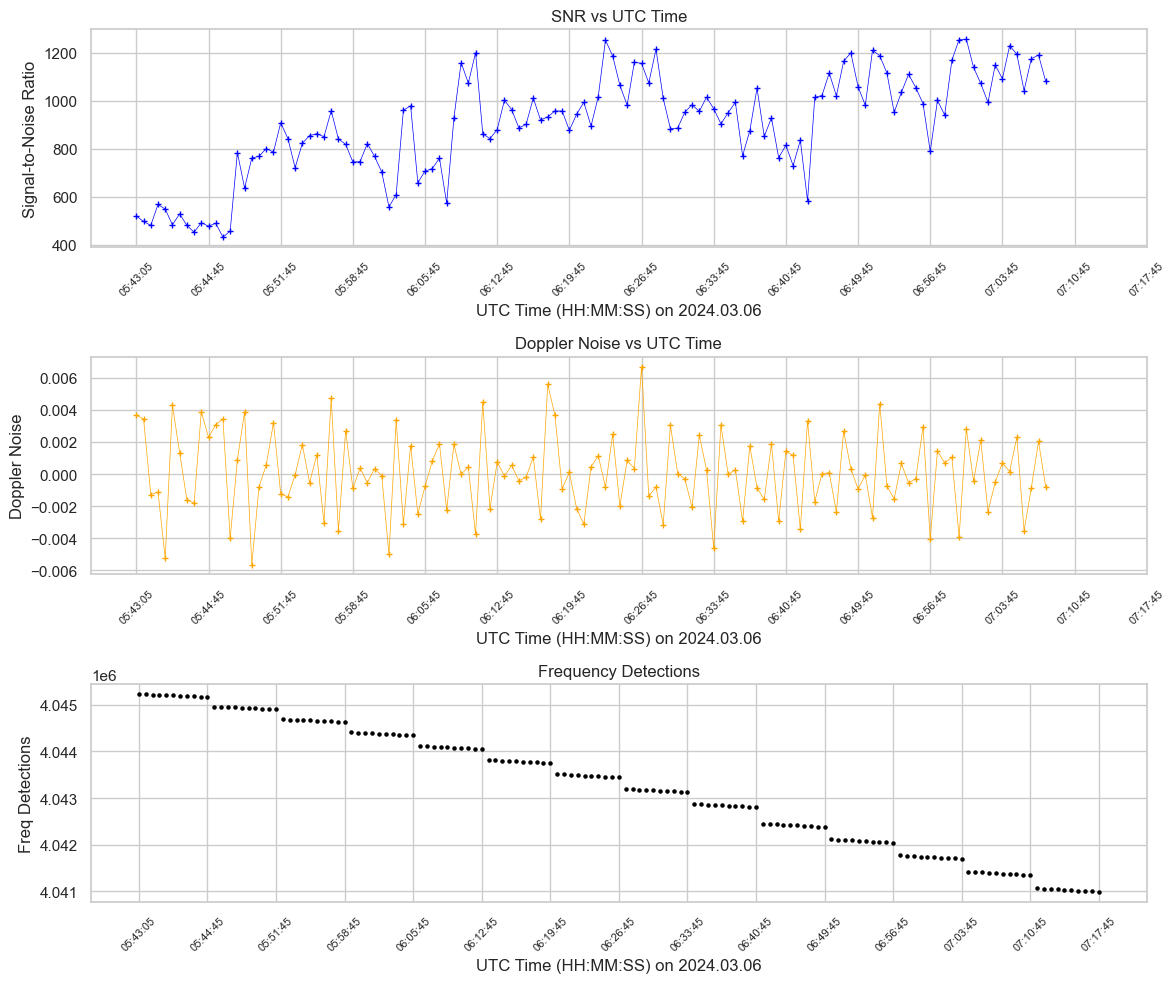

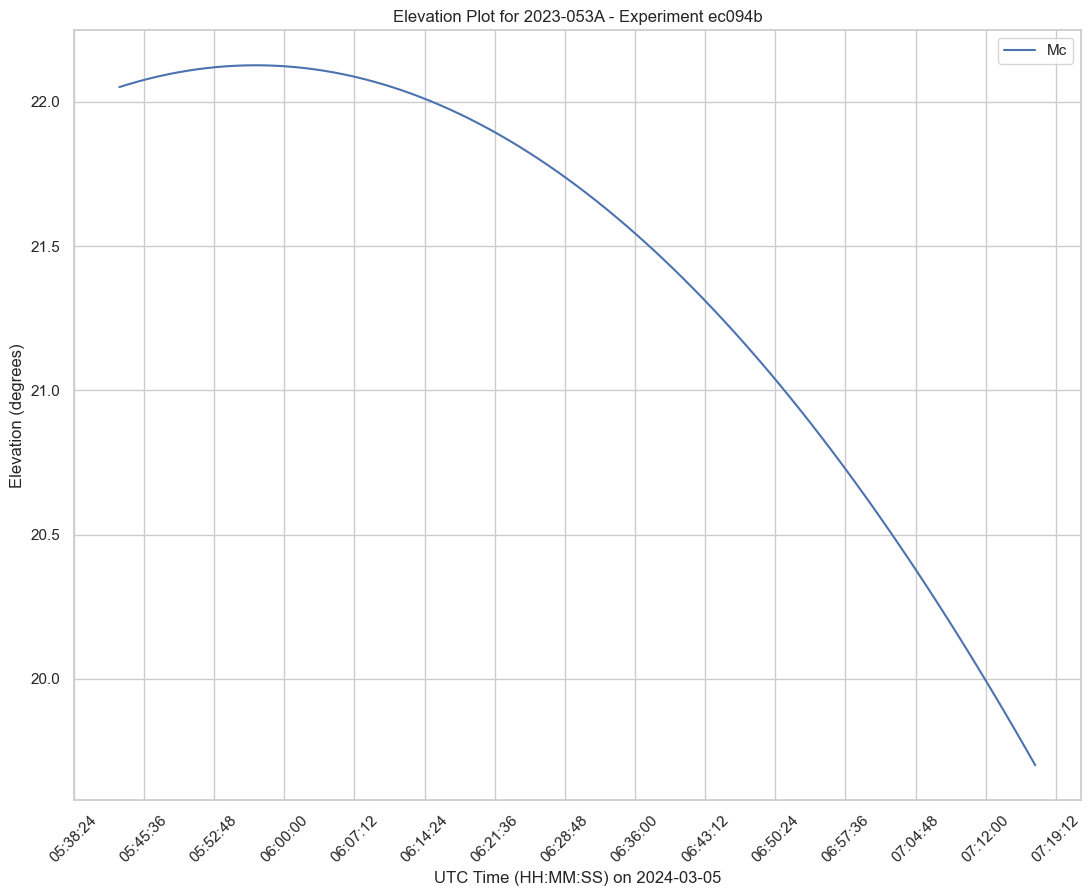

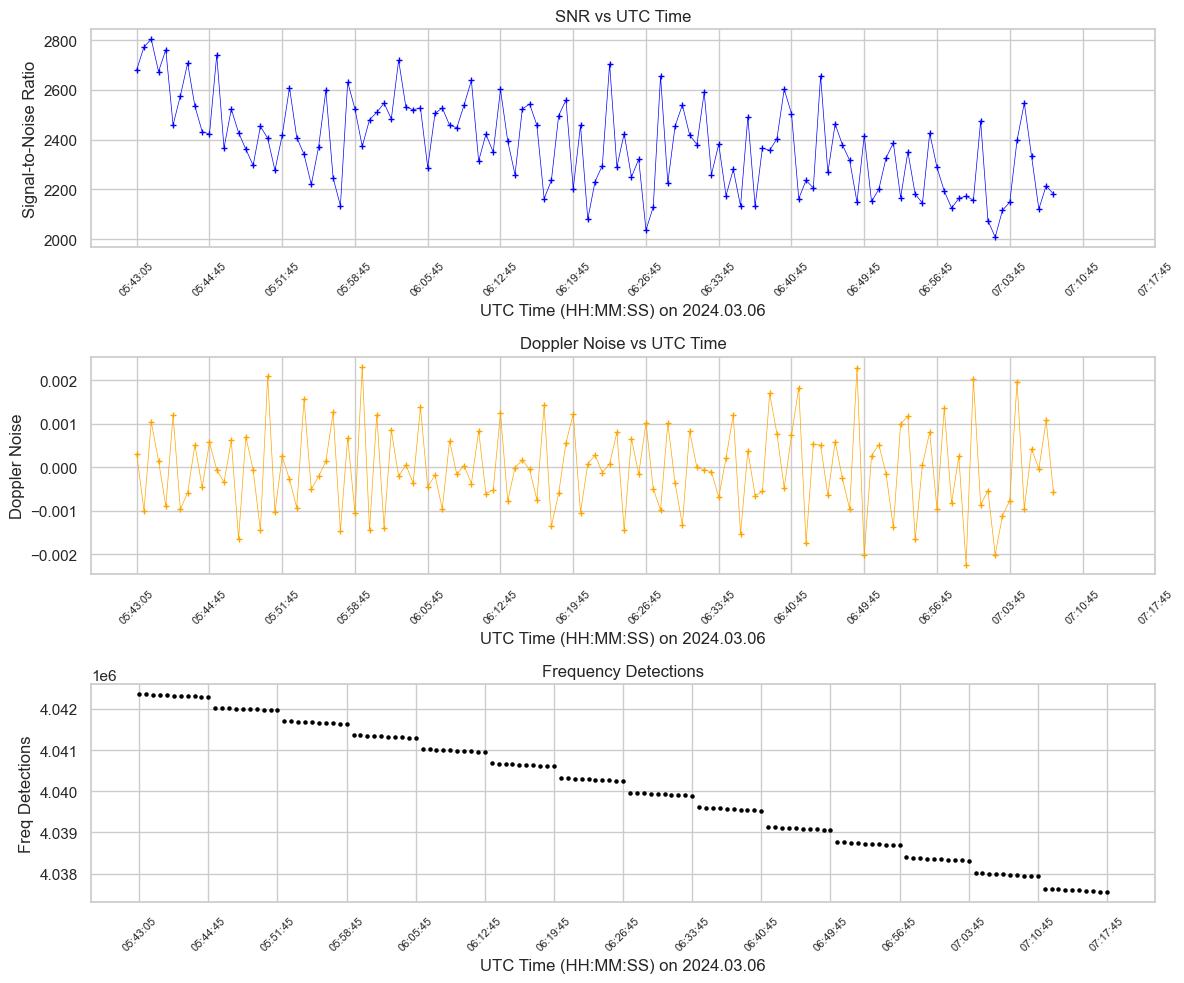

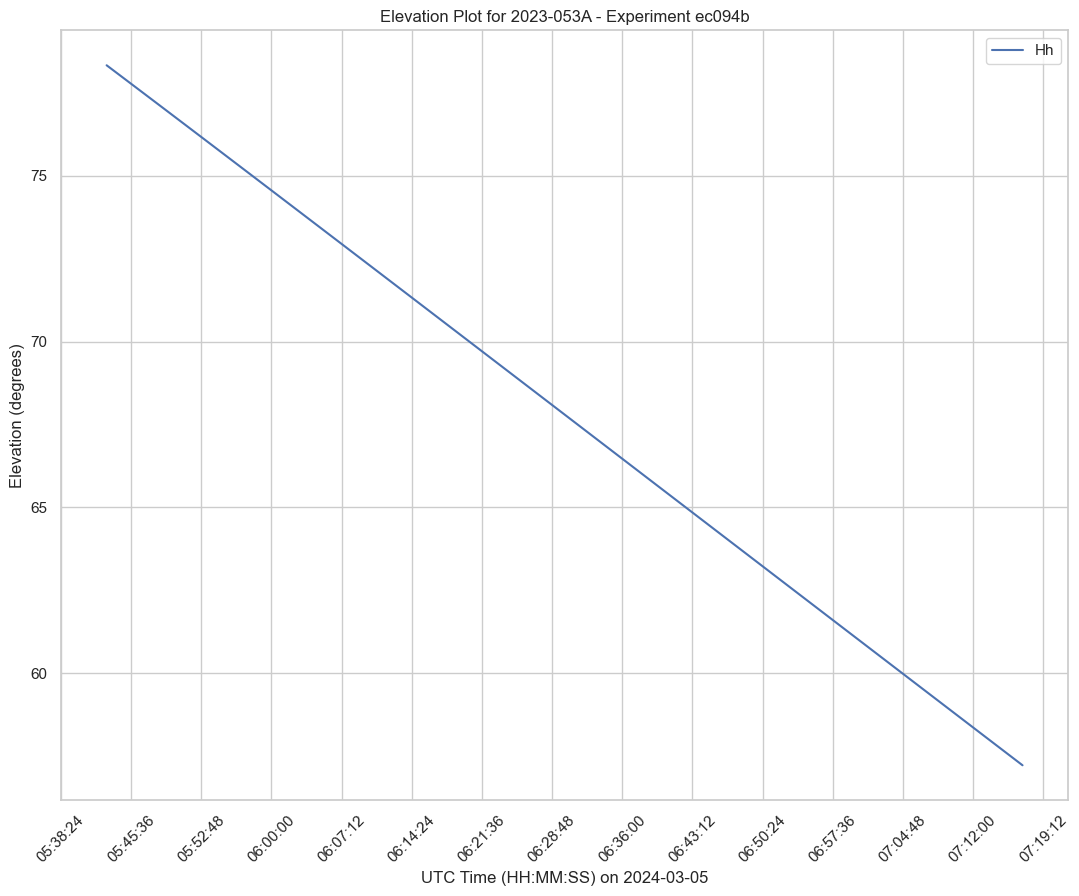

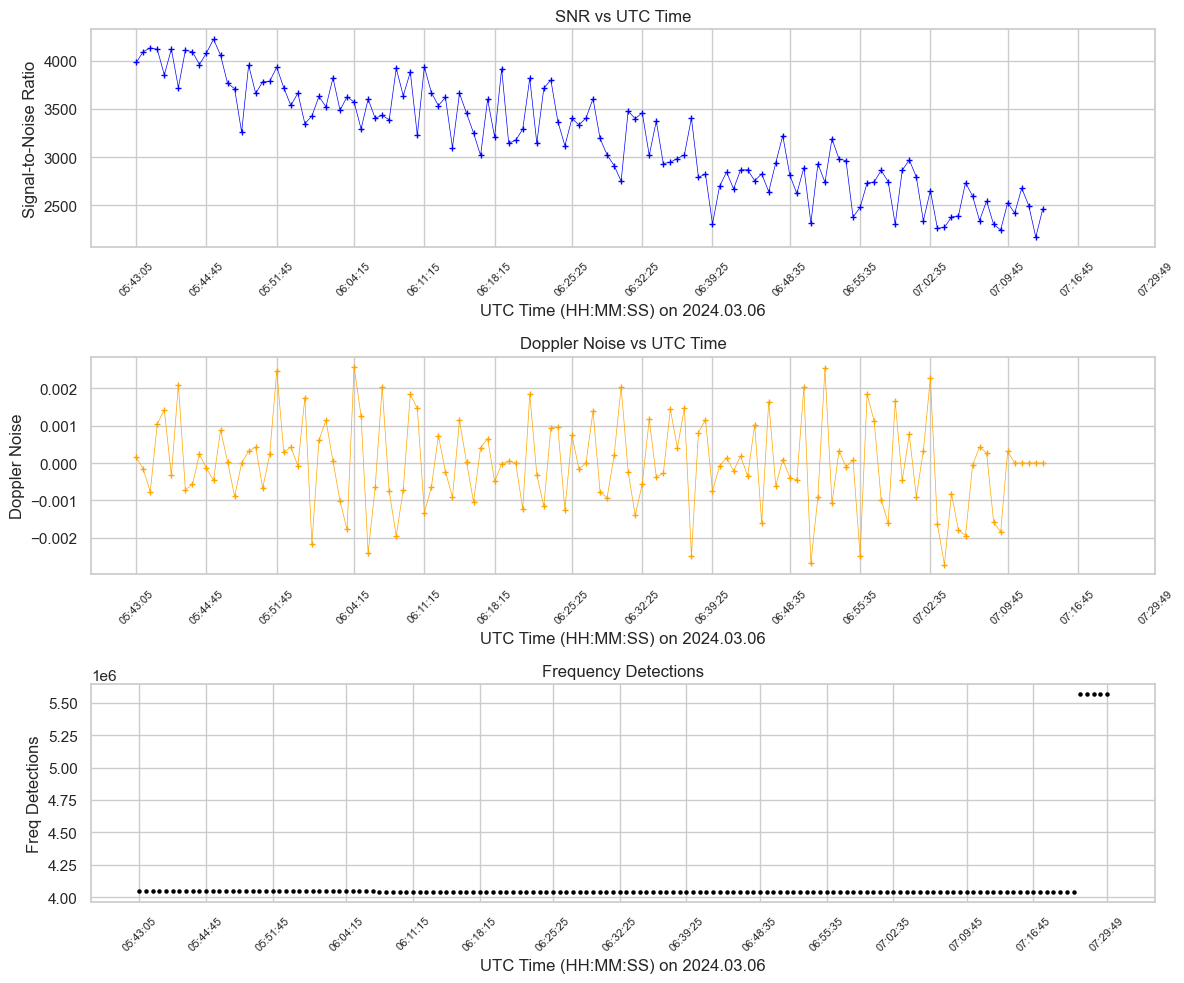

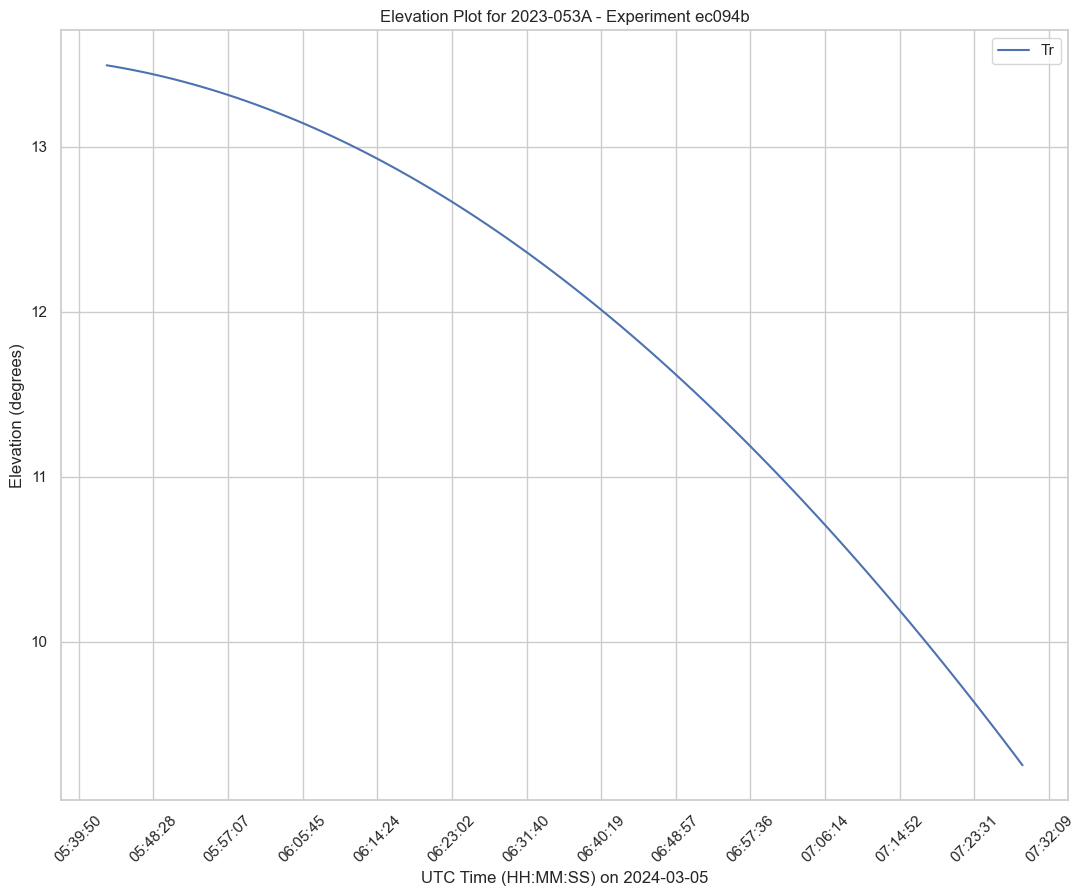

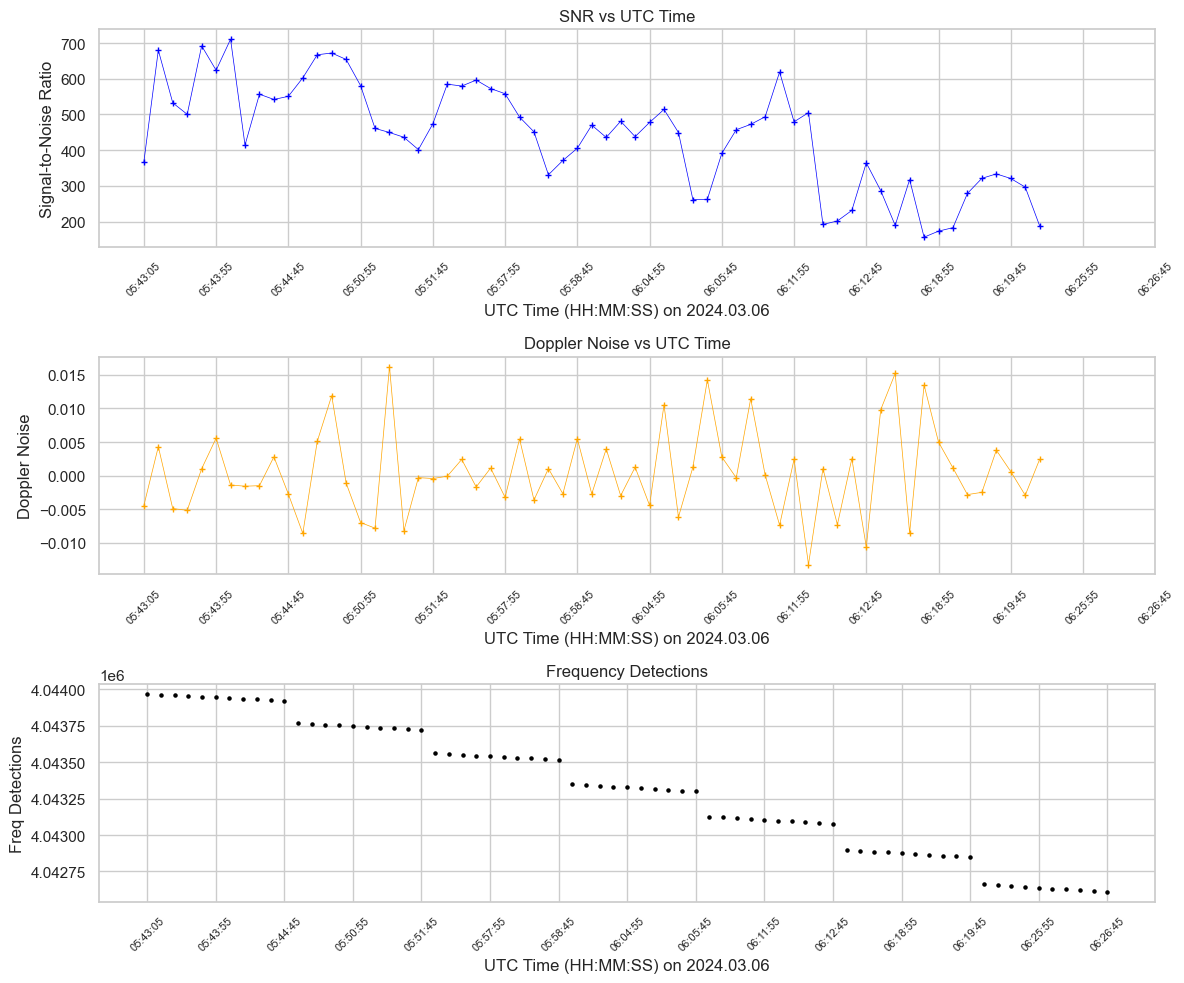

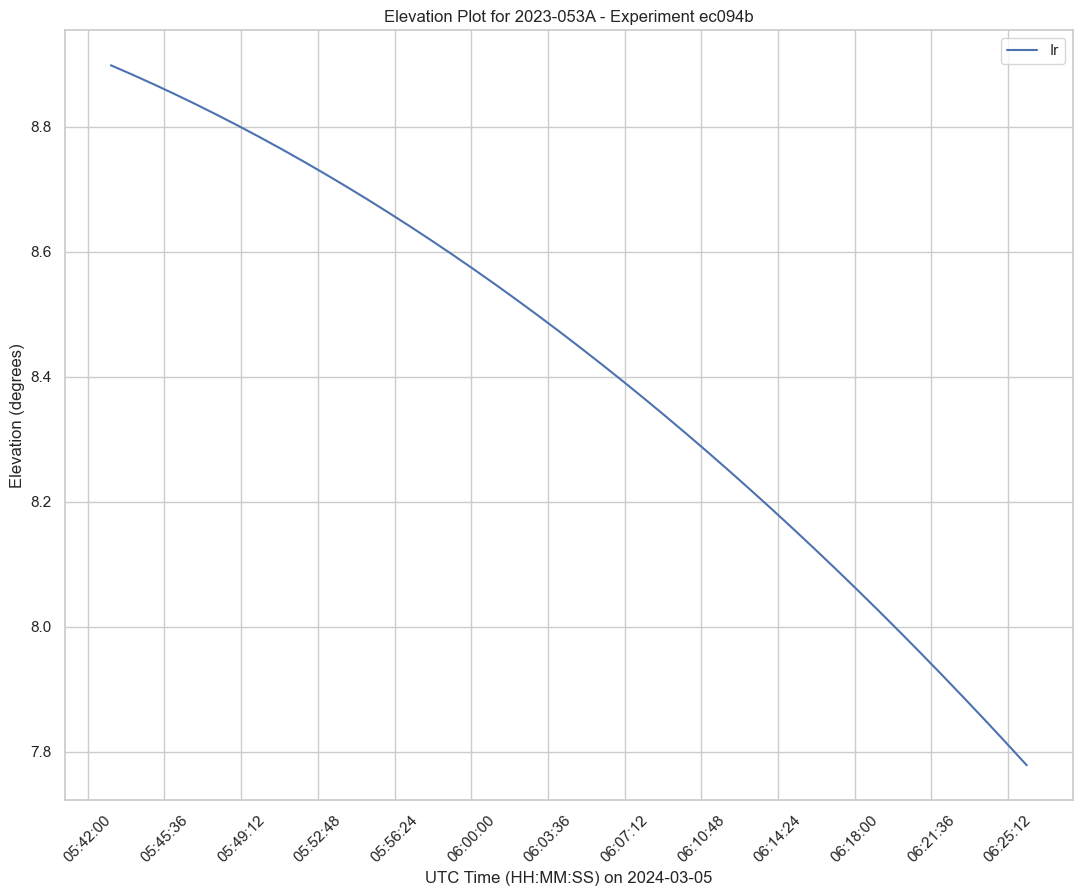

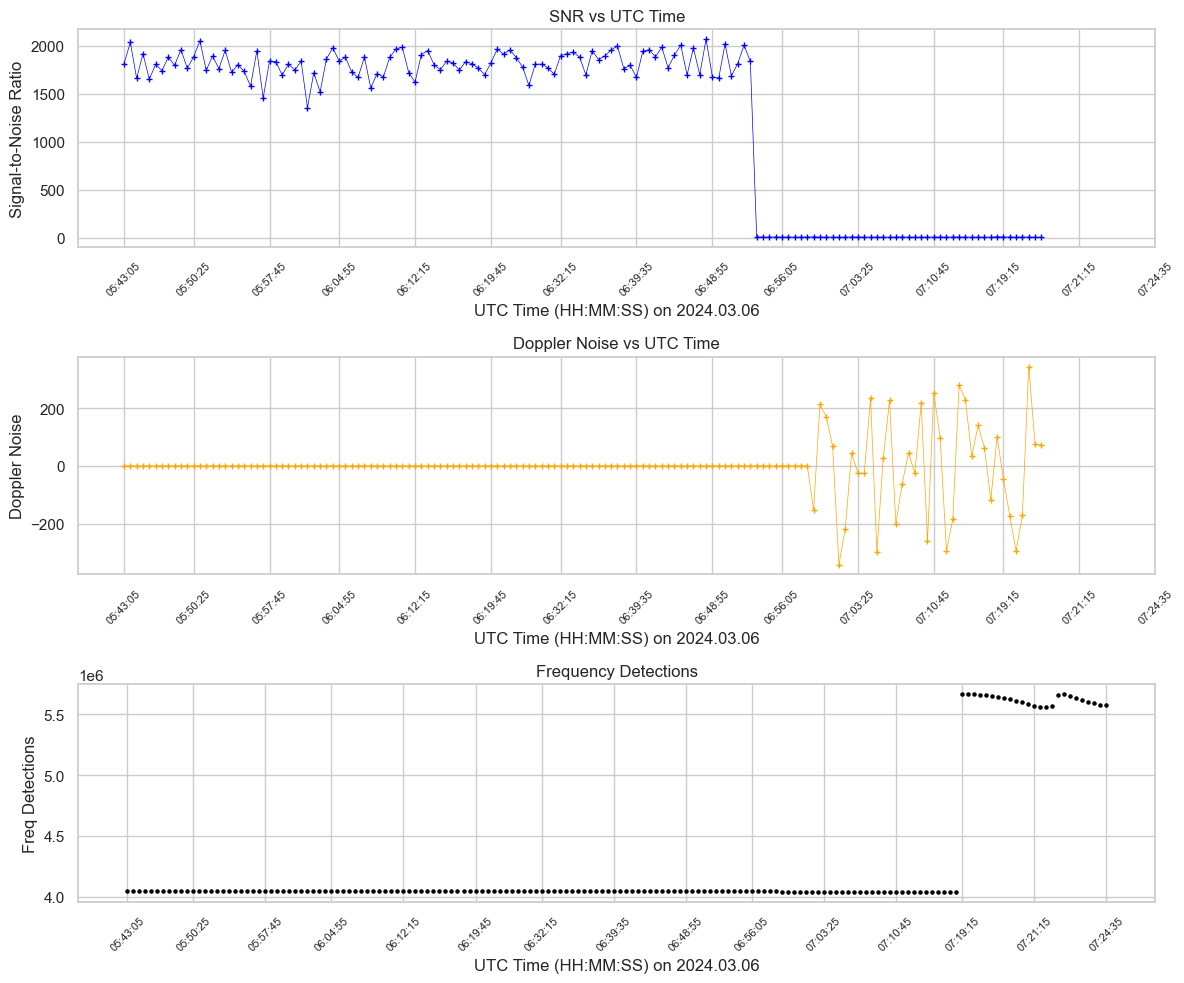

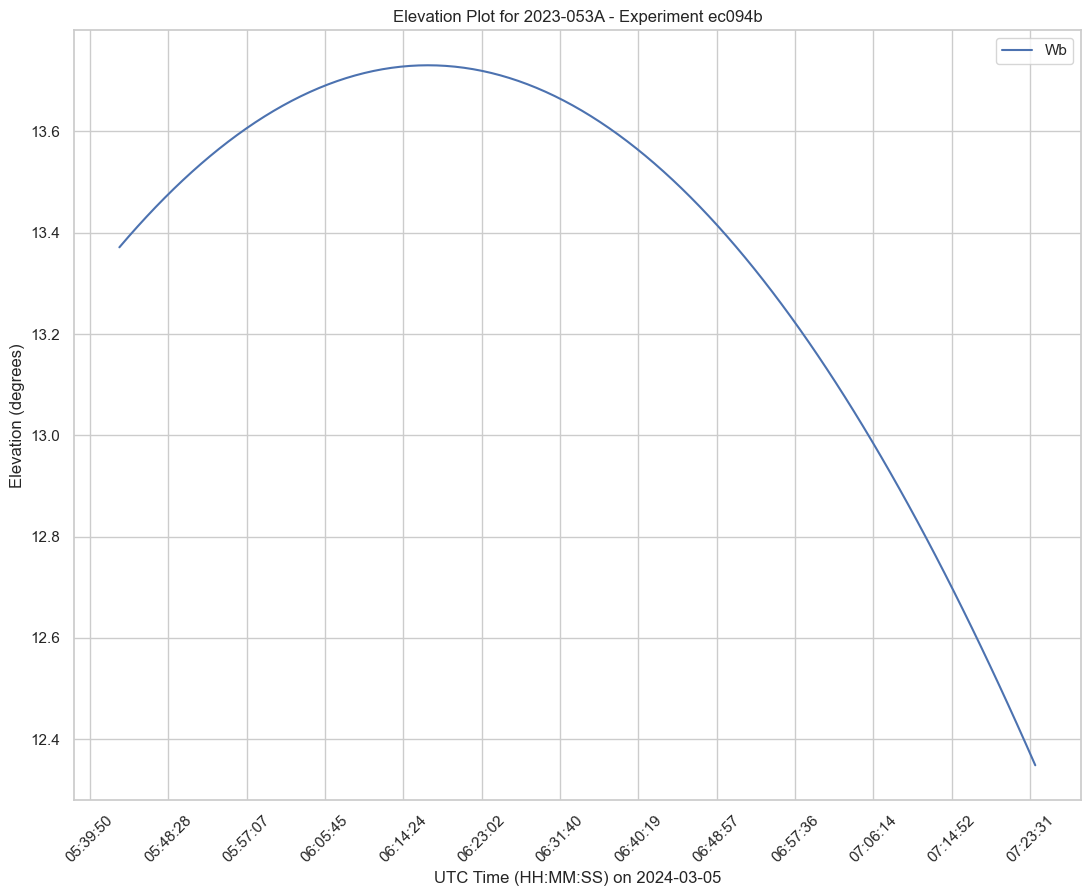

<Figure size 1500x1000 with 0 Axes>

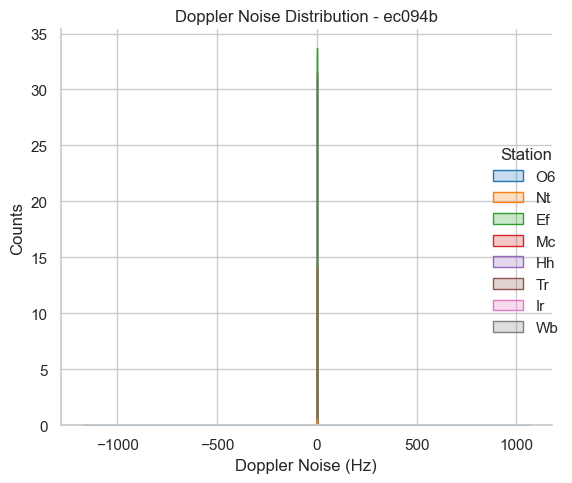

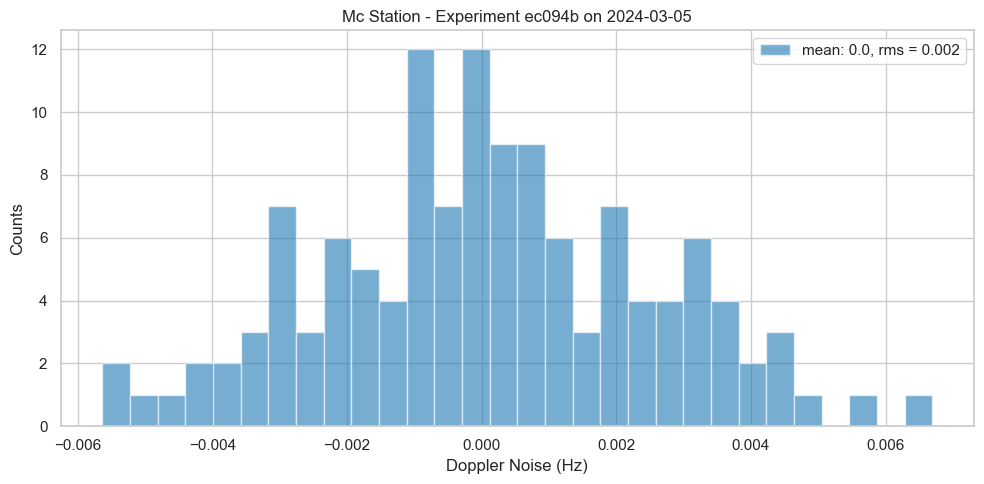

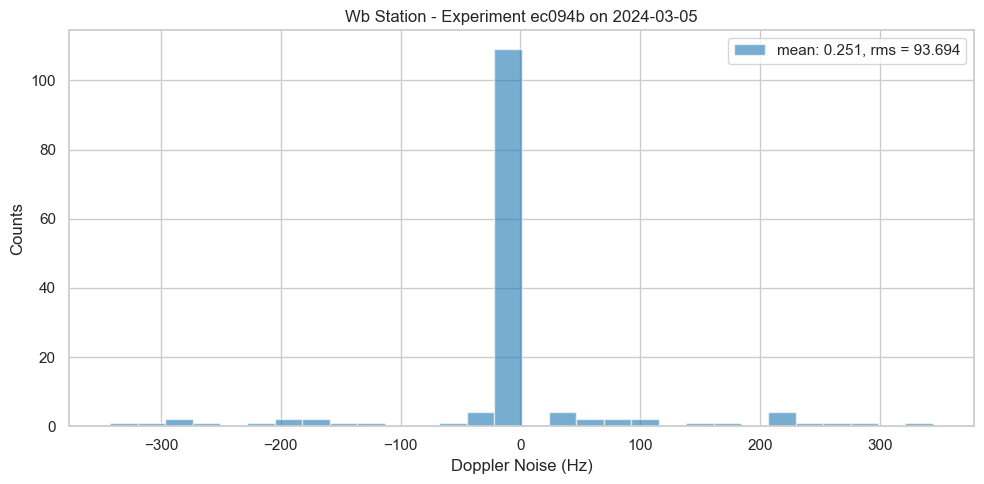

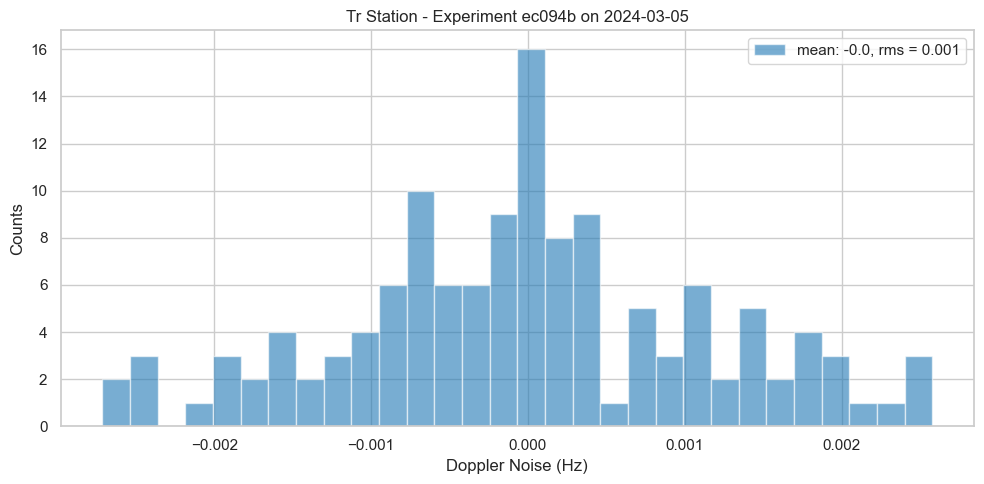

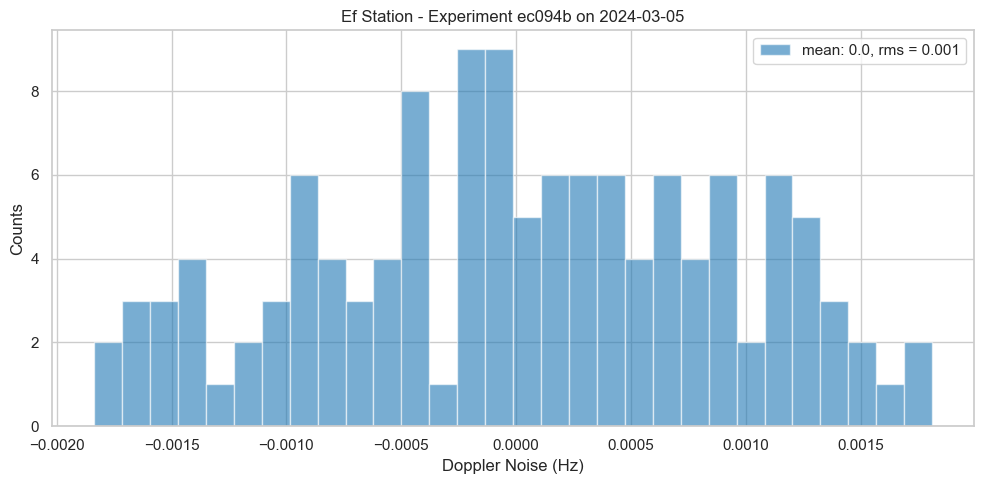

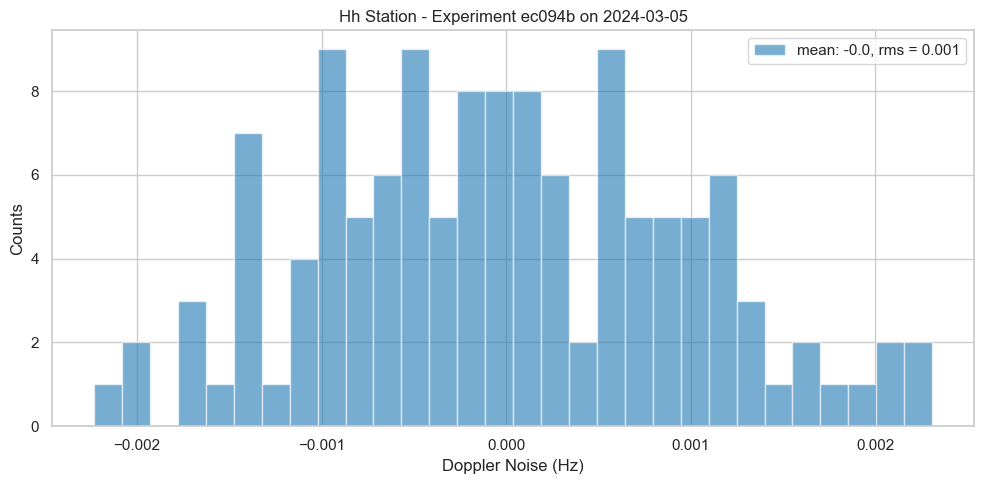

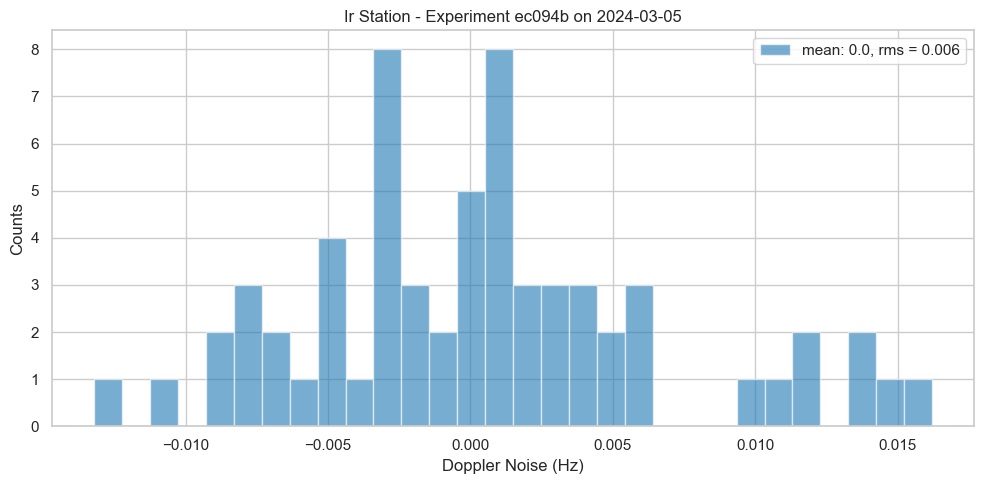

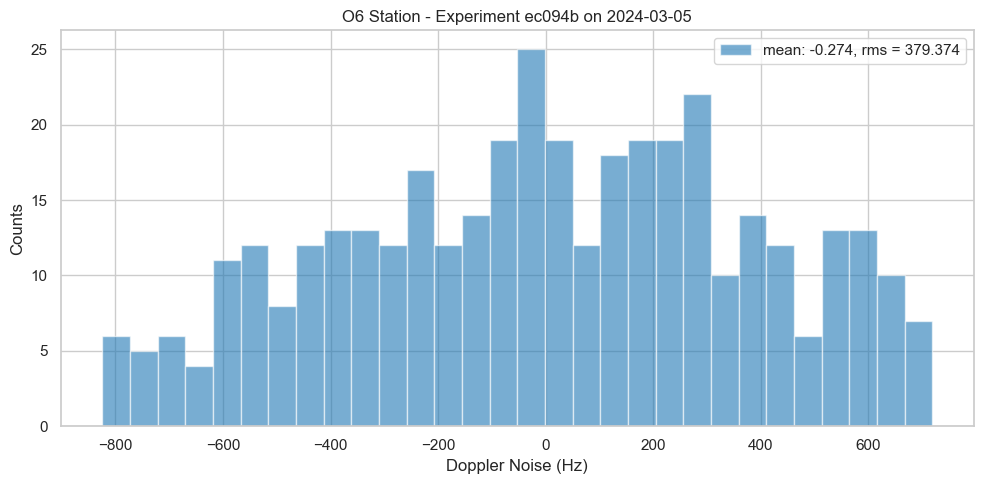

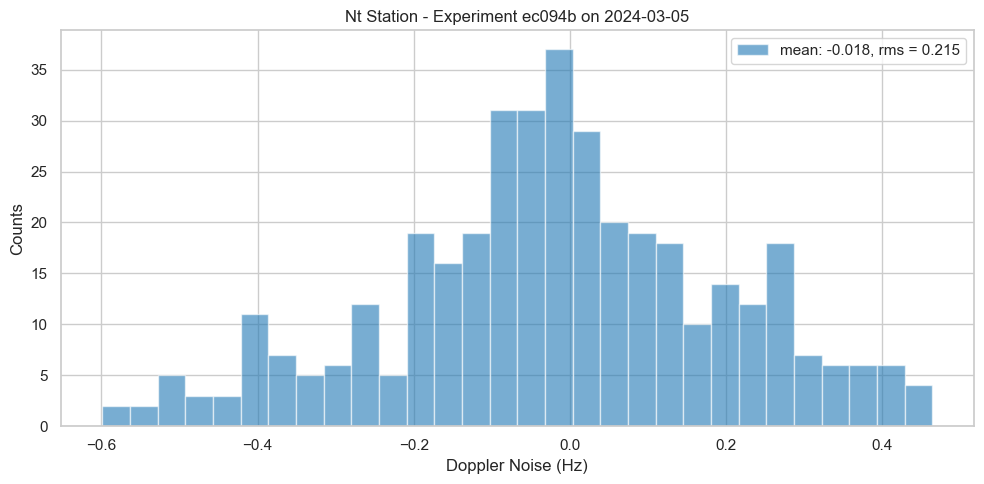

<Figure size 1500x1000 with 0 Axes>

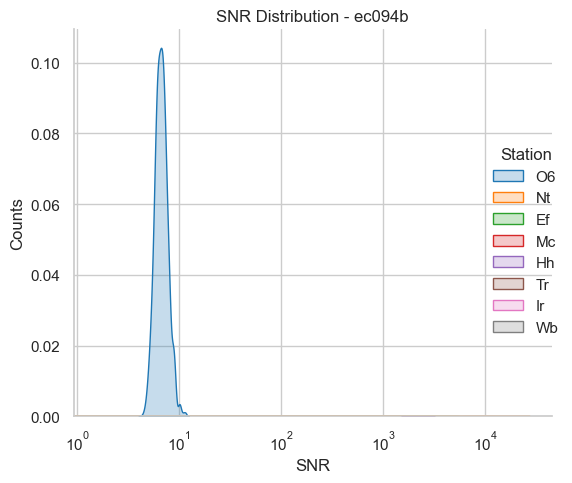

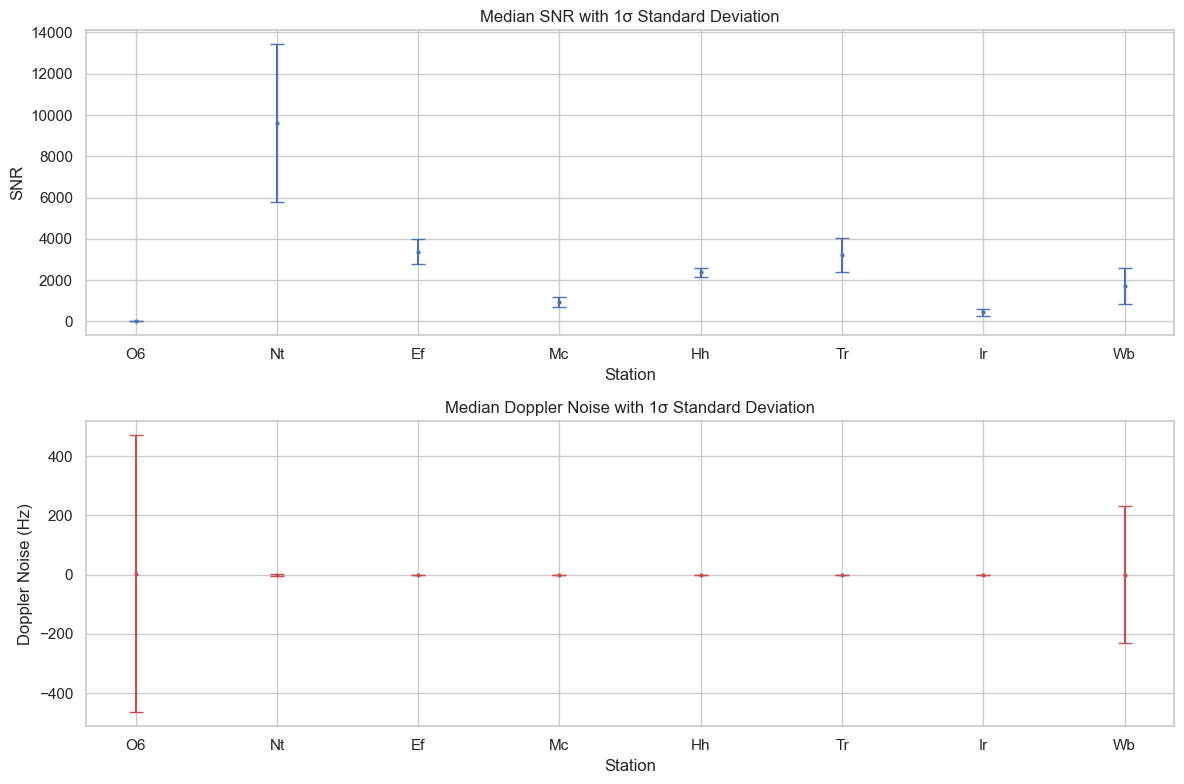

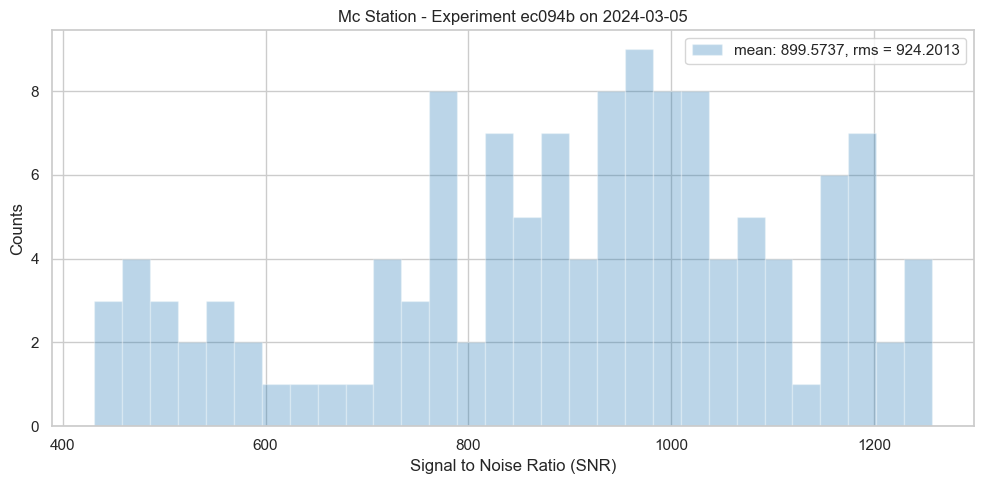

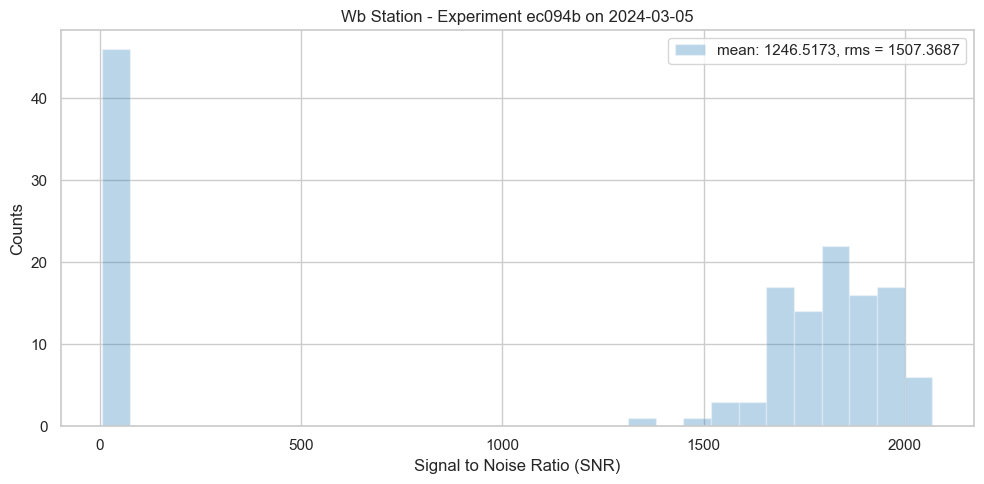

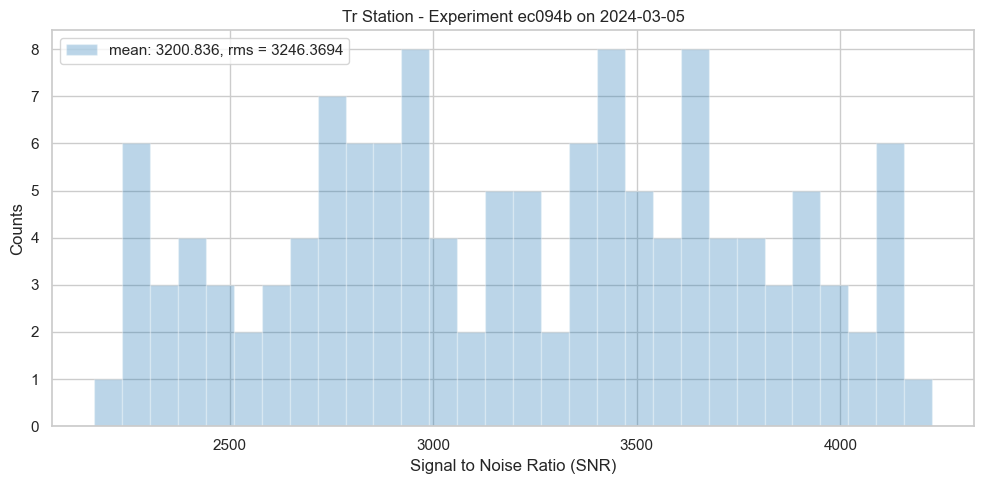

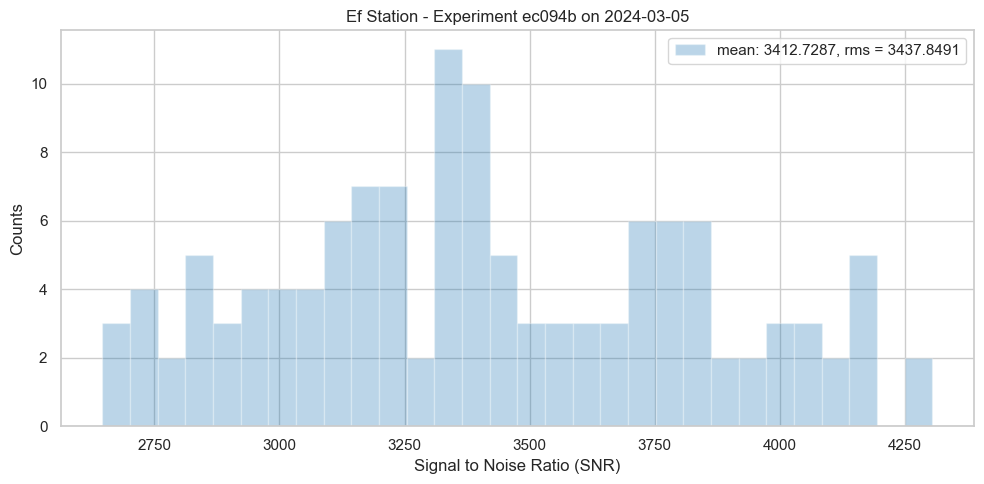

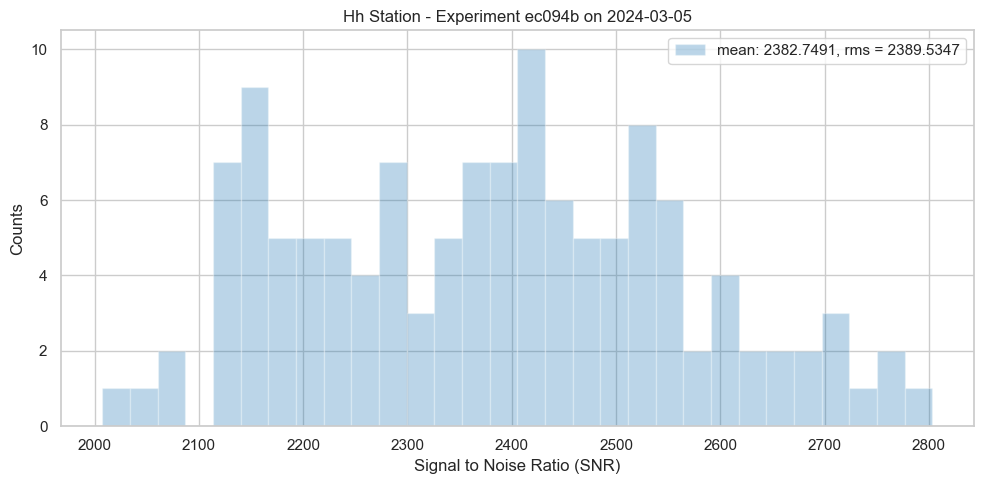

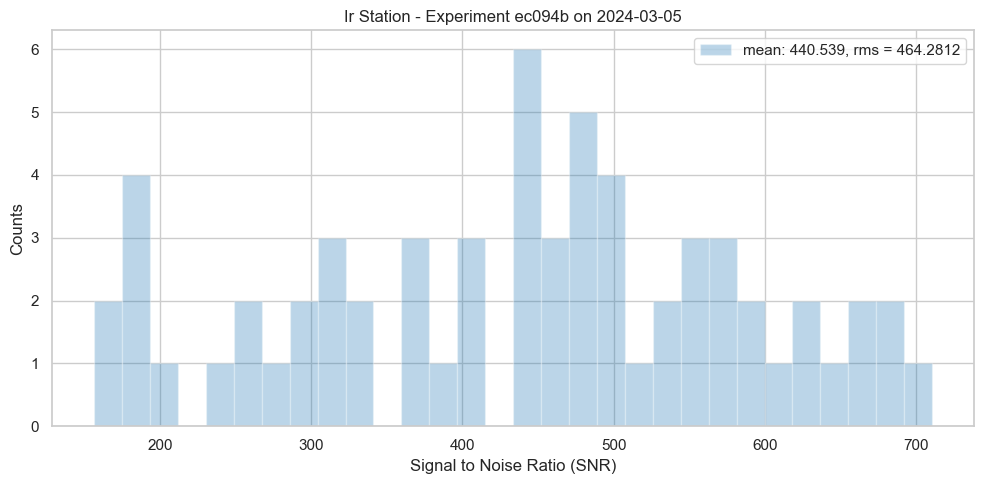

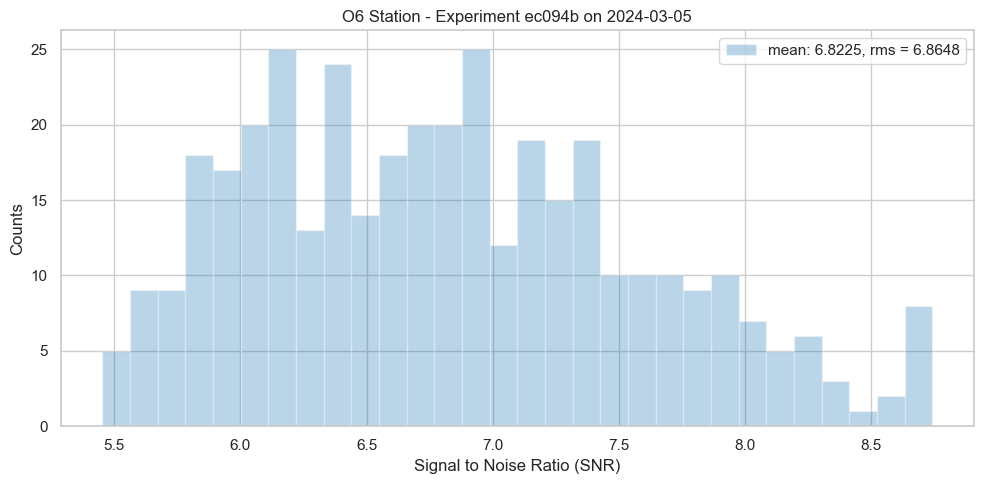

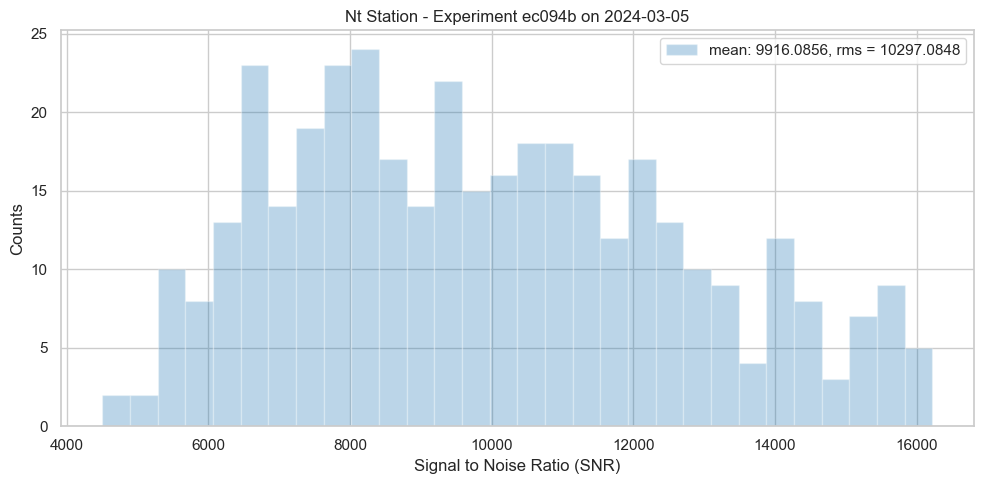

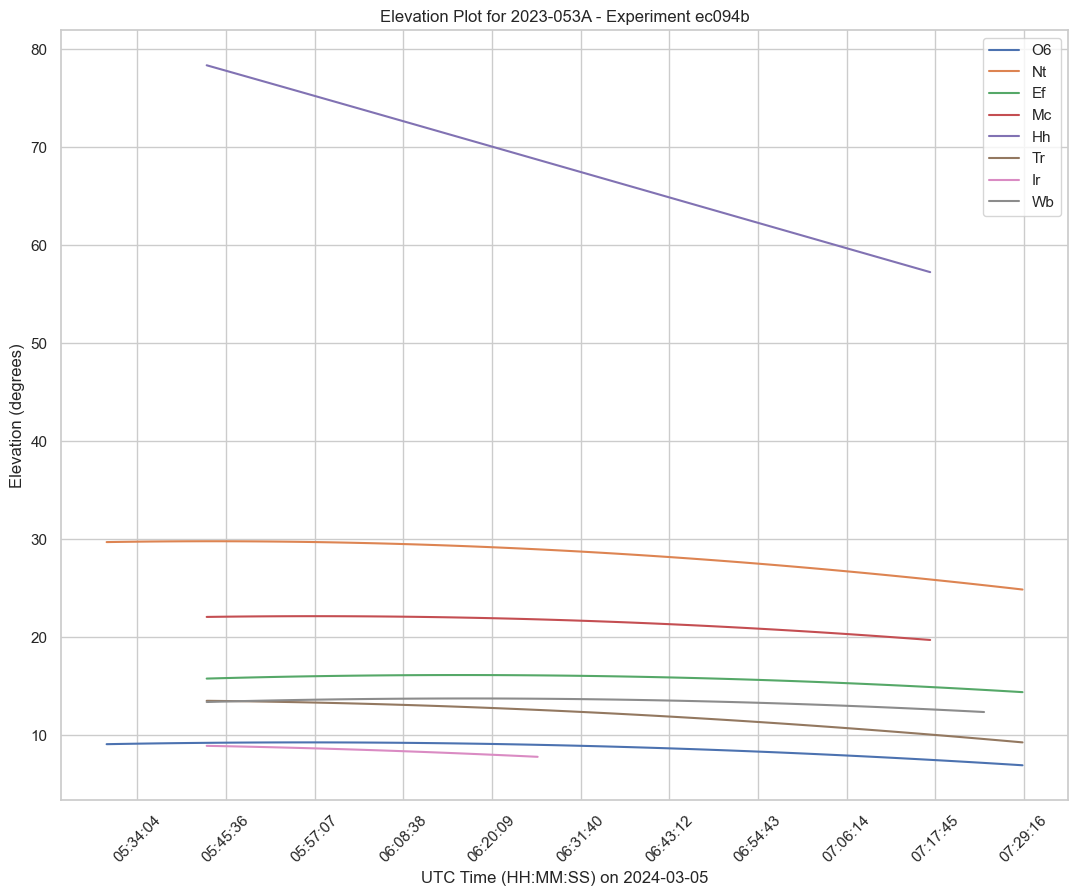

In [19]:
# Loop over missions and experiments
for mission_name, experiment_names in experiments_to_analyze.items():
    for experiment_name in experiment_names:
        fdets_folder_path = '../small_dataset/juice/ec094b/input/complete/'
        output_dir = '../small_dataset/juice/ec094b/output/'
        horizons_target = utilities.mission_name_to_horizons_target(mission_name)
        print(f'Performing Statistical Analysis for mission: {mission_name} (Horizons Code: {horizons_target})...')

        # Get list of FDETS files
        dir_path = fdets_folder_path
        files_list = []
        station_ids = []
        for file in os.listdir(dir_path):
            if file.startswith('Fdets') and file.endswith('r2i.txt'):
                files_list.append(os.path.join(dir_path, file))

        # Extract data
        extracted_data_list =  process_fdets.extract_folder_data(dir_path)

        for extracted_data in extracted_data_list:
            station_id = extracted_data['receiving_station_name']
            for file_name in files_list:
                if str(extracted_data['utc_date']) not in file_name:
                    continue
                if station_id != process_fdets.get_station_name_from_file(file_name):
                    continue
                else:
                    # Plot user-defined parameters (doppler noise, SNR, fdets)
                    analysis.plot_user_defined_parameters(
                        extracted_data,
                        save_dir = os.path.join(output_dir, 'user_defined_parameters'),
                        plot_snr = True,
                        plot_doppler_noise = True,
                        plot_fdets= True,
                        suppress = True
                    )

                    # Plot elevation for each file (station)
                    analysis.get_elevation_plot(
                        [file_name],
                        horizons_target,
                        [station_id],
                        experiment_name =experiment_name ,
                        suppress = True,
                        save_dir = os.path.join(output_dir, 'elevation')
                    )

                    station_ids.append(station_id) # Append station_id to list station_ids

        # Plot SNR and Doppler Noise statistics
        analysis.get_all_stations_statistics(
            fdets_folder_path = fdets_folder_path,
            experiment_name = experiment_name,
            extracted_parameters_list= extracted_data_list,
            doppler_noise_statistics = True,
            snr_statistics= True,
            remove_outliers = True,
            save_dir = os.path.join(output_dir, 'statistics')
        )

        # Plot combined elevation plot for all stations
        analysis.get_elevation_plot(
            files_list,
            horizons_target,
            station_ids,
            experiment_name,
            suppress = True,
            save_dir = os.path.join(output_dir, 'statistics')
        )

        #Combine Images
        snr_noise_folder = os.path.join(output_dir, 'user_defined_parameters/snr_noise_fdets')
        elevation_folder = os.path.join(output_dir, 'elevation')


        # Get lists of image filenames from both folders
        snr_images = sorted([file for file in os.listdir(snr_noise_folder) if file.endswith('.png')])  # Ensure sorted order
        elevation_images = sorted([file for file in os.listdir(elevation_folder) if file.endswith('.png')])  # Ensure sorted order

        # Zip them into tuples (assuming each folder contains matching files)
        images_to_combine = zip(snr_images, elevation_images)

        # Iterate through image pairs and combine them
        for snr_image, elevation_image in images_to_combine:
            station_id = snr_image.split('_')[0]
            date = snr_image.split('_')[1]

            # Create full paths
            snr_image_path = os.path.join(snr_noise_folder, snr_image)
            elevation_image_path = os.path.join(elevation_folder, elevation_image)

            # Call the function with a list of tuples, maintaining correct filename
            utilities.combine_plots(
               image_paths =[snr_image_path, elevation_image_path],  # Pass a list of image paths
               output_dir = os.path.join(output_dir, 'elevation_snr_noise'),
               output_file_name=f'{station_id}_{date}_combined.png',
               direction='vertical'
            )

    print('Done.')